Converged in 4 epochs.


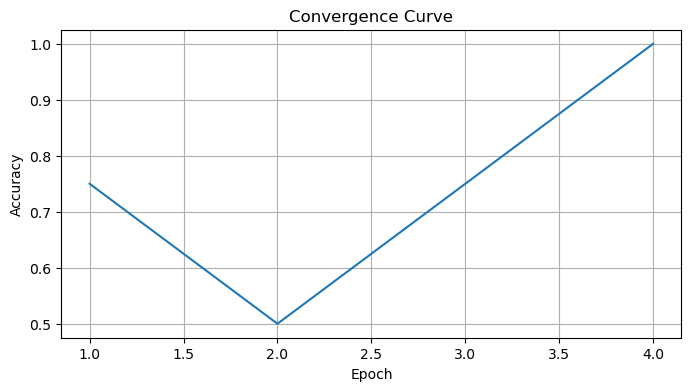

[-1 -1  1]
[-1  1 -1]


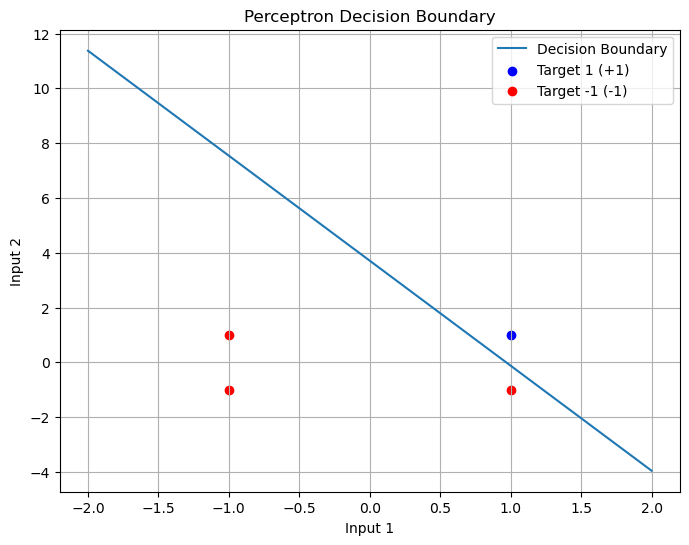

In [1]:

#Lab-01
#implement a perceptron network for and function with bipolar inputs and targets


import numpy as np
import matplotlib.pyplot as plt

# Bipolar activation function
def bipolar_activation(x):
    return 1 if x >= 0 else -1

# Perceptron training function
def perceptron_train(inputs, targets, learning_rate=0.1, max_epochs=100):
    num_inputs =inputs.shape[1] 
    num_samples =inputs.shape[0] 

    # Initialize weights and bias
    weights = np.random.randn(num_inputs)
    bias = np.random.randn()

    convergence_curve = []

    for epoch in range(max_epochs):
        misclassified = 0

        for i in range(num_samples):
            net_input = np.dot(inputs[i], weights) + bias
            predicted = bipolar_activation(net_input)

            if predicted != targets[i]:
                misclassified += 1
                weights =weights+ learning_rate * (targets[i] - predicted)*inputs[i]
                bias =bias+ learning_rate * (targets[i] - predicted)

        accuracy = (num_samples - misclassified) / num_samples
        convergence_curve.append(accuracy)

        if misclassified == 0:
            print("Converged in {} epochs.".format(epoch + 1))
            break

    return weights, bias, convergence_curve

# Main function
if __name__ == "__main__":
    # Input and target data (bipolar representation)
    inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
    targets = np.array([-1, -1, -1, 1])

    # Training the perceptron
    weights, bias, convergence_curve = perceptron_train(inputs, targets)

    # Decision boundary line
    x = np.linspace(-2, 2, 100)
    y = (-weights[0] * x - bias) / weights[1]

    # Plot convergence curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Convergence Curve')
    plt.grid()
    plt.show()

    # Plot the decision boundary line and data points
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Decision Boundary')
    print(inputs[targets == -1][:, 0])
    print(inputs[targets == -1][:, 1])
    plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (+1)', color='blue')
    plt.scatter(inputs[targets == -1][:, 0], inputs[targets == -1][:, 1], label='Target -1 (-1)', color='red')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid()
    plt.show()






In [2]:
# -*- coding: utf-8 -*-
"""Lab-2&10.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1-eiKlg9-ygyTaW8aUjkW_bdKKdDeKjfm
"""

import numpy as np

def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def multi_class(W1, W2, X, D):
    alpha = 0.9
    N = 5

    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[k, :].reshape(-1, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2

    return W1, W2

def main():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    X[:, :, 4] = np.array([[1, 1, 1, 1, 1],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])

    D = np.eye(5)

    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1

    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)

    N = 5
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        print(f"\n\n Output for X[:,:,{k}]:\n\n")
        print(f"{y} \n\n This matrix from see that {k+1} position accuracy is higher that is : {max(y)} So this number is correctly identified")

if __name__ == "__main__":
    main()



 Output for X[:,:,0]:


[[9.99990560e-01]
 [3.73975045e-06]
 [7.29323123e-07]
 [4.95516529e-06]
 [1.56459758e-08]] 

 This matrix from see that 1 position accuracy is higher that is : [0.99999056] So this number is correctly identified


 Output for X[:,:,1]:


[[3.81399150e-06]
 [9.99984069e-01]
 [1.07138749e-05]
 [7.38201374e-07]
 [6.65377695e-07]] 

 This matrix from see that 2 position accuracy is higher that is : [0.99998407] So this number is correctly identified


 Output for X[:,:,2]:


[[2.10669179e-06]
 [9.17015598e-06]
 [9.99972467e-01]
 [2.22084036e-06]
 [1.40352894e-05]] 

 This matrix from see that 3 position accuracy is higher that is : [0.99997247] So this number is correctly identified


 Output for X[:,:,3]:


[[4.72578106e-06]
 [8.98916172e-07]
 [9.07090140e-07]
 [9.99990801e-01]
 [2.66714208e-06]] 

 This matrix from see that 4 position accuracy is higher that is : [0.9999908] So this number is correctly identified


 Output for X[:,:,4]:


[[6.12205780e-07]
 [2.2

Lab-03

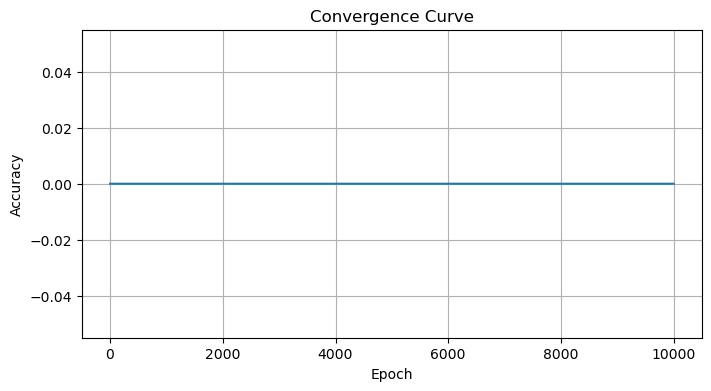

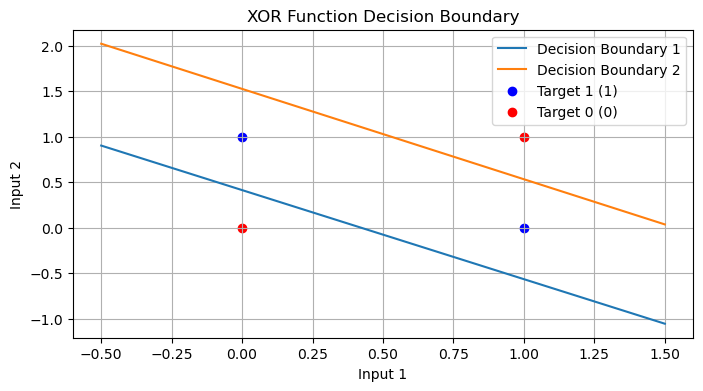

In [3]:
#Lab-03

#XOR implementation using McCulloch pit neuron


import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([0, 1, 1, 0]) 

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights and biases with random values
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

convergence_curve = []

# Training the neural network
for epoch in range(max_epochs):
    misclassified = 0
    for i in range(len(inputs)):
        # Forward pass
        hidden_layer_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = targets[i] - predicted_output
        #print(error)
        if targets[i] != predicted_output:
            misclassified += 1

        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output[:, np.newaxis] * output_delta * learning_rate
        bias_output += output_delta * learning_rate

        weights_input_hidden += inputs[i][:, np.newaxis] * hidden_delta * learning_rate
        bias_hidden += hidden_delta * learning_rate
    
    accuracy = (len(inputs) - misclassified) / len(inputs)
    #print((accuracy))
    convergence_curve.append(accuracy)

    if misclassified == 0:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Decision boundary line
x = np.linspace(-0.5, 1.5, 100)
y = (-weights_input_hidden[0, 0] * x - bias_hidden[0]) / weights_input_hidden[1, 0]
y2 = (-weights_input_hidden[0, 1] * x - bias_hidden[1]) / weights_input_hidden[1, 1]

# Plot convergence curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Convergence Curve')
plt.grid()
plt.show()

# Plot the decision boundary line and data points
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Decision Boundary 1')
plt.plot(x, y2, label='Decision Boundary 2')
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (1)', color='blue')
plt.scatter(inputs[targets == 0][:, 0], inputs[targets == 0][:, 1], label='Target 0 (0)', color='red')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function Decision Boundary')
plt.legend()
plt.grid()
plt.show()


Lab-04

In [4]:
#Lab-04

import numpy as np

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset with binary inputs and outputs
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([[0],
                    [1],
                    [1],
                    [0]])

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights and biases with random values
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

# Training the neural network with backpropagation
for epoch in range(max_epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate the error
    error = targets - predicted_output

    # Backpropagation
    output_delta = error * sigmoid_derivative(predicted_output)
    hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0) * learning_rate  # Removed keepdims=True here

    weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

# Test the XOR function with the trained neural network
test_inputs = np.array([[0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

hidden_layer_input = np.dot(test_inputs, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print("Predicted outputs:")
print(predicted_output)

# Round the predicted outputs to get binary values (0 or 1)
predicted_binary = np.round(predicted_output).astype(int)
print("Predicted binary outputs:")
print(predicted_binary)




Predicted outputs:
[[0.05395132]
 [0.9505447 ]
 [0.95009809]
 [0.05355567]]
Predicted binary outputs:
[[0]
 [1]
 [1]
 [0]]


Lab-05

Converged in 417 epochs.


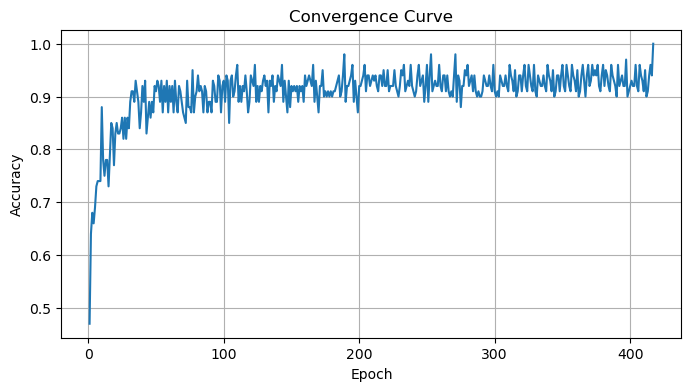

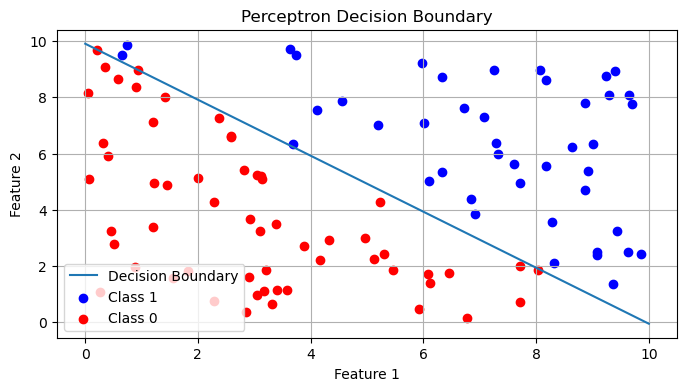

In [5]:
#Lab-05

import numpy as np
import matplotlib.pyplot as plt

# Perceptron training function
def perceptron_train(inputs, targets, learning_rate=0.1, max_epochs=10000):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]

    # Initialize weights and bias
    weights = np.random.randn(num_inputs)
    bias = np.random.randn()

    convergence_curve = []

    for epoch in range(max_epochs):
        misclassified = 0

        for i in range(num_samples):
            net_input = np.dot(inputs[i], weights) + bias
            predicted = 1 if net_input >= 0 else 0

            if predicted != targets[i]:
                misclassified += 1
                update = learning_rate * (targets[i] - predicted)
                weights += update * inputs[i]
                bias += update

        accuracy = (num_samples - misclassified) / num_samples
        convergence_curve.append(accuracy)

        if misclassified == 0:
            print("Converged in {} epochs.".format(epoch + 1))
            break

    return weights, bias, convergence_curve

# Generate random linearly separable data points
def generate_data(n_samples):
    np.random.seed(42)
    inputs = np.random.rand(n_samples, 2)*10
    #print(inputs)
    targets = np.sum(inputs, axis=1) >= 10
    targets = targets.astype(int)
    #print(targets)
    return inputs, targets

# Main function
if __name__ == "__main__":
    # Generate linearly separable data
    n_samples = 100
    inputs, targets = generate_data(n_samples)

    # Training the perceptron
    weights, bias, convergence_curve = perceptron_train(inputs, targets)

    # Decision boundary line
    x = np.linspace(0, 10, 100)
    y = (-weights[0] * x - bias) / weights[1]

    # Plot convergence curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Convergence Curve')
    plt.grid()
    plt.show()

    # Plot the decision boundary line and data points
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label='Decision Boundary')
    plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Class 1', color='blue')
    plt.scatter(inputs[targets == 0][:, 0], inputs[targets == 0][:, 1], label='Class 0', color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid()
    plt.show()


Lab-06

In [6]:
#Lab-06

import numpy as np

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset with binary inputs and outputs
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([[0],
                    [1],
                    [1],
                    [0]])

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
momentum_factor = 0.9
max_epochs = 10000

# Initialize weights and biases with random values
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

# Initialize previous weight updates with zeros for momentum
prev_weight_input_hidden_update = np.zeros((input_layer_size, hidden_layer_size))
prev_bias_hidden_update = np.zeros(hidden_layer_size)

prev_weight_hidden_output_update = np.zeros((hidden_layer_size, output_layer_size))
prev_bias_output_update = np.zeros(output_layer_size)

# Training the neural network with backpropagation and momentum
for epoch in range(max_epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate the error
    error = targets - predicted_output

    # Backpropagation
    output_delta = error * sigmoid_derivative(predicted_output)
    hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
    
    #print(hidden_delta)
    # Update weights and biases with momentum
    weight_input_hidden_update = inputs.T.dot(hidden_delta) * learning_rate
    bias_hidden_update = np.sum(hidden_delta, axis=0) * learning_rate

    weight_hidden_output_update = hidden_layer_output.T.dot(output_delta) * learning_rate
    bias_output_update = np.sum(output_delta, axis=0) * learning_rate

    weights_input_hidden += weight_input_hidden_update + momentum_factor * prev_weight_input_hidden_update
    bias_hidden += bias_hidden_update + momentum_factor * prev_bias_hidden_update

    weights_hidden_output += weight_hidden_output_update + momentum_factor * prev_weight_hidden_output_update
    bias_output += bias_output_update + momentum_factor * prev_bias_output_update

    # Store previous updates for momentum
    prev_weight_input_hidden_update = weight_input_hidden_update
    prev_bias_hidden_update = bias_hidden_update

    prev_weight_hidden_output_update = weight_hidden_output_update
    prev_bias_output_update = bias_output_update

    # Calculate mean squared error for convergence check
    mse = np.mean(error ** 2)
    if mse < 1e-6:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Test the XOR function with the trained neural network
test_inputs = np.array([[0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

hidden_layer_input = np.dot(test_inputs, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print("Predicted outputs:")
print(predicted_output)

# Round the predicted outputs to get binary values (0 or 1)
predicted_binary = np.round(predicted_output).astype(int)
print("Predicted binary outputs:")
print(predicted_binary)


Predicted outputs:
[[0.03383077]
 [0.97009142]
 [0.96988489]
 [0.03162844]]
Predicted binary outputs:
[[0]
 [1]
 [1]
 [0]]


Lab-07

In [7]:
#Lab-07


import numpy as np

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input and target datasets
X_input = np.array([[0, 0, 1],
                    [0, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])

D_target = np.array([[0],
                     [0],
                     [1],
                     [1]])

# Neural network parameters
input_layer_size = 3
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights with random values
np.random.seed(42)
weights = np.random.randn(input_layer_size, output_layer_size)
#bias =np.random.rand(input_layer_size)
print(weights)

# Training the neural network with SGD
for epoch in range(max_epochs):
    error_sum = 0

    for i in range(len(X_input)):
        # Forward pass
        input_data = X_input[i]
        target_data = D_target[i]

        net_input = np.dot(input_data, weights)
        predicted_output = sigmoid(net_input)
        
        #print(predicted_output)

        # Calculate error
        error = target_data - predicted_output
        #print(error)
        error_sum += np.abs(error)
        #print(error_sum)

        # Update weights using the delta learning rule
        weight_update = learning_rate * error * sigmoid_derivative(predicted_output) * input_data
        #print(weight_update[:, np.newaxis])
        weights += weight_update[:, np.newaxis]  # Update weights for each input separately

    # Check for convergence
    if error_sum <0.01:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Test data
test_data = X_input

# Use the trained model to recognize target function
print("update weight ")
print(weights)

print("Target Function Test:")
for i in range(len(test_data)):
    input_data = test_data[i]
    net_input = np.dot(input_data, weights)
    predicted_output = sigmoid(net_input)

    print(f"Input: {input_data} -> Output: {np.round(predicted_output).astype(int)}")


[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]
update weight 
[[ 7.25950187]
 [-0.22431325]
 [-3.41036643]]
Target Function Test:
Input: [0 0 1] -> Output: [0]
Input: [0 1 1] -> Output: [0]
Input: [1 0 1] -> Output: [1]
Input: [1 1 1] -> Output: [1]


Lab-08

In [8]:
#lab -08


import numpy as np

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input and target datasets
X_input = np.array([[0, 0, 1],
                    [0, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])

D_target = np.array([[0],
                     [0],
                     [1],
                     [1]])

# Neural network parameters
input_layer_size = 3
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights with random values
np.random.seed(42)
weights = np.random.randn(input_layer_size, output_layer_size)

# Training the neural network with batch method
for epoch in range(max_epochs):
    # Forward pass
    net_input = np.dot(X_input, weights)
    predicted_output = sigmoid(net_input)

    # Calculate error
    error = D_target - predicted_output
    error_sum = np.sum(np.abs(error))

    # Update weights using the delta learning rule
    weight_update = learning_rate * np.dot(X_input.T, error * sigmoid_derivative(predicted_output))
    weights += weight_update

    # Check for convergence
    if error_sum < 0.01:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Test data
test_data = X_input

# Use the trained model to recognize target function
print("Target Function Test:")
#for i in range(len(test_data)):
input_data = test_data
net_input = np.dot(input_data, weights)
predicted_output = sigmoid(net_input)

print(f"Input: {input_data} -> Output: {np.round(predicted_output).astype((int))}")



Target Function Test:
Input: [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]] -> Output: [[0]
 [0]
 [1]
 [1]]


Lab-09

In [9]:
#Lab-09

import numpy as np
import time

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset with binary inputs and outputs
X_input = np.array([[0, 0, 1],
                    [0, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])

D_target = np.array([[0],
                     [0],
                     [1],
                     [1]])

# Neural network parameters
input_layer_size = 3
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights with random values
np.random.seed(42)
weights_sgd = np.random.randn(input_layer_size, output_layer_size)
weights_batch = np.random.randn(input_layer_size, output_layer_size)

# Training the neural network with SGD
start_time_sgd = time.time()
for epoch in range(max_epochs):
    error_sum = 0

    for i in range(len(X_input)):
        # Forward pass
        input_data = X_input[i]
        target_data = D_target[i]

        net_input = np.dot(input_data, weights_sgd)
        predicted_output = sigmoid(net_input)

        # Calculate error
        error = target_data - predicted_output
        error_sum += np.abs(error)

        # Update weights using the delta learning rule
        weight_update = learning_rate * error * sigmoid_derivative(predicted_output) * input_data
        weights_sgd += weight_update[:, np.newaxis]  # Update weights for each input separately

    # Check for convergence
    if error_sum < 0.01:
        break
end_time_sgd = time.time()

# Training the neural network with the batch method
start_time_batch = time.time()
for epoch in range(max_epochs):
    # Forward pass
    net_input = np.dot(X_input, weights_batch)
    predicted_output = sigmoid(net_input)

    # Calculate error
    error = D_target - predicted_output
    error_sum = np.sum(np.abs(error))

    # Update weights using the delta learning rule
    weight_update = learning_rate * np.dot(X_input.T, error * sigmoid_derivative(predicted_output))
    weights_batch += weight_update

    # Check for convergence
    if error_sum < 0.01:
        break
end_time_batch = time.time()

# Test data
test_data = X_input

# Use the trained models to recognize target function
def test_model(weights):
    predicted_output = sigmoid(np.dot(test_data, weights))
    return np.round(predicted_output).astype(int)

print("SGD Results:")
print("Time taken: {:.6f} seconds".format(end_time_sgd - start_time_sgd))
print("Trained weights:")
print(weights_sgd)
print("Predicted binary outputs:")
print(test_model(weights_sgd))

print("\nBatch Method Results:")
print("Time taken: {:.6f} seconds".format(end_time_batch - start_time_batch))
print("Trained weights:")
print(weights_batch)
print("Predicted binary outputs:")
print(test_model(weights_batch))


SGD Results:
Time taken: 0.666876 seconds
Trained weights:
[[ 7.25950187]
 [-0.22431325]
 [-3.41036643]]
Predicted binary outputs:
[[0]
 [0]
 [1]
 [1]]

Batch Method Results:
Time taken: 0.210134 seconds
Trained weights:
[[ 7.26775966]
 [-0.22304058]
 [-3.41538639]]
Predicted binary outputs:
[[0]
 [0]
 [1]
 [1]]


Lab-11

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
235/235 [==============================] - 10s 39ms/step - loss: 1.0445 - accuracy: 0.4540 - val_loss: 0.9330 - val_accuracy: 0.5467
Epoch 2/10
235/235 [==============================] - 9s 37ms/step - loss: 0.9029 - accuracy: 0.5698 - val_loss: 0.8814 - val_accuracy: 0.5903
Epoch 3/10
235/235 [==============================] - 9s 38ms/step - loss: 0.8271 - accuracy: 0.6215 - val_loss: 0.8817 - val_accuracy: 0.5900
Epoch 4/10
235/235 [==============================] - 9s 37ms/step - loss: 0.7725 - accuracy: 0.6587 - val_loss: 0.7689 - val_accuracy: 0.6507
Epoch 5/10
235/235 [==============================] - 9s 37ms/step - loss: 0.7108 - accuracy: 0.6916 - val_loss: 0.7600 - val_accuracy: 0.6550
Epoch 6/10
235/235 [==============================] - 9s 37ms/step - loss: 0.6670 - accuracy: 0.7132 - val_loss: 0.7207 - val_accuracy: 0.6813
Epoch 7/10
235/235 [==============================] - 9s 38ms/step - loss:

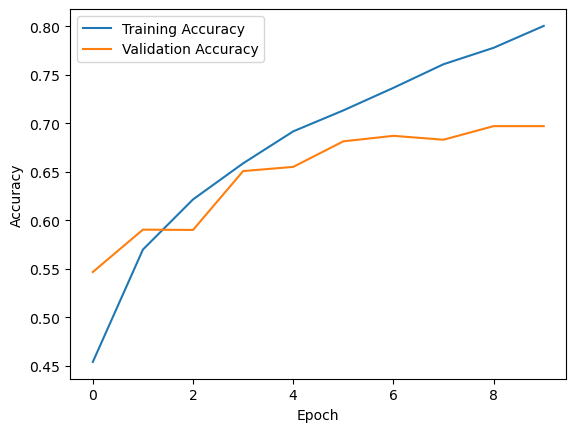

94/94 [==============================] - 1s 7ms/step
Predicted: dog, True Class: cat
Predicted: cat, True Class: cat
Predicted: dog, True Class: dog
Predicted: dog, True Class: dog
Predicted: bird, True Class: dog
Predicted: bird, True Class: bird
Predicted: dog, True Class: dog
Predicted: dog, True Class: dog
Predicted: cat, True Class: bird
Predicted: dog, True Class: dog
Predicted: dog, True Class: dog
Predicted: cat, True Class: cat
Predicted: dog, True Class: cat
Predicted: dog, True Class: cat
Predicted: bird, True Class: cat
Predicted: bird, True Class: bird
Predicted: bird, True Class: bird
Predicted: cat, True Class: cat
Predicted: bird, True Class: bird
Predicted: bird, True Class: bird
Predicted: cat, True Class: cat
Predicted: cat, True Class: cat
Predicted: bird, True Class: bird
Predicted: bird, True Class: dog
Predicted: bird, True Class: bird
Predicted: dog, True Class: cat
Predicted: dog, True Class: dog
Predicted: cat, True Class: cat
Predicted: cat, True Class: cat
P

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Class labels to be classified (face, fruit, and bird)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes_to_classify = ['bird', 'cat', 'dog']

# Filter the dataset for the specific classes to classify (bird, cat, dog)
train_mask = np.isin(y_train, [class_labels.index(cls) for cls in classes_to_classify]).flatten()
test_mask = np.isin(y_test, [class_labels.index(cls) for cls in classes_to_classify]).flatten()

x_train_filtered = x_train[train_mask]
y_train_filtered = y_train[train_mask]

x_test_filtered = x_test[test_mask]
y_test_filtered = y_test[test_mask]

# Preprocess the data
num_classes = 10
image_height, image_width, num_channels = x_train_filtered.shape[1:]

x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test_filtered = x_test_filtered.astype('float32') / 255.0

y_train_filtered = utils.to_categorical(y_train_filtered, num_classes)
y_test_filtered = utils.to_categorical(y_test_filtered, num_classes)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
num_epochs = 10
history = model.fit(x_train_filtered, y_train_filtered, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(x_test_filtered, y_test_filtered))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_filtered, y_test_filtered)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(x_test_filtered)

# Interpret the results
for i in range(len(x_test_filtered)):
    predicted_class = class_labels[np.argmax(predictions[i])]
    true_class = class_labels[np.argmax(y_test_filtered[i])]
    print(f"Predicted: {predicted_class}, True Class: {true_class}")


In [11]:
#Lab-10

import numpy as np
from numpy import unravel_index
def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def multi_class(W1, W2, X, D):
    alpha = 0.9
    N = 5
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[k, :].reshape(5, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2
    return W1, W2
def main():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))
    target = np.array([[1],
                     [2],
                     [3],
                     [4],
                     [5]])
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    X[:, :, 4] = np.array([[1, 1, 1, 1, 1],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    D = np.eye(5)
    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1
    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)
    N = 5
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        y = np.round(y)
        g,h = unravel_index(y.argmax(), y.shape)
        print(target[g][h])
main()

1
2
3
4
5


In [12]:
#Lab-02
import numpy as np
from numpy import unravel_index
def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def multi_class(W1, W2, X, D):
    alpha = 0.9
    N = 4
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[k, :].reshape(5, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2
    return W1, W2
def main():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))
    target = np.array([[1],
                     [2],
                     [3],
                     [4],
                     [5]])
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    D = np.eye(5)
    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1
    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)
    N = 4
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        y = np.round(y)
        g,h = unravel_index(y.argmax(), y.shape)
        print(target[g][h])
main()

1
2
3
4


In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

['banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'Cucumber'
 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber'
 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber'
 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber'
 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber'
 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber' 'Cucumber']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Epoch 1/30
2/2 [==============================] - 3s 545ms/step - loss: 0.7205 - accuracy: 0.3846
Epoch 2/30
2/2 [==============================] - 1s 540ms/step - loss: 0.7159 - accuracy: 0.5000
Epoch 3/30
2/2 [==============================]

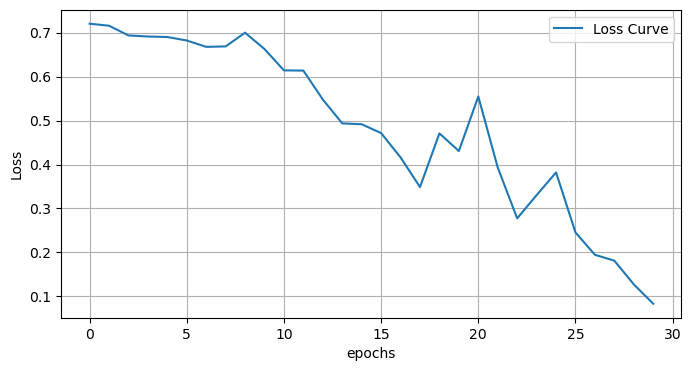

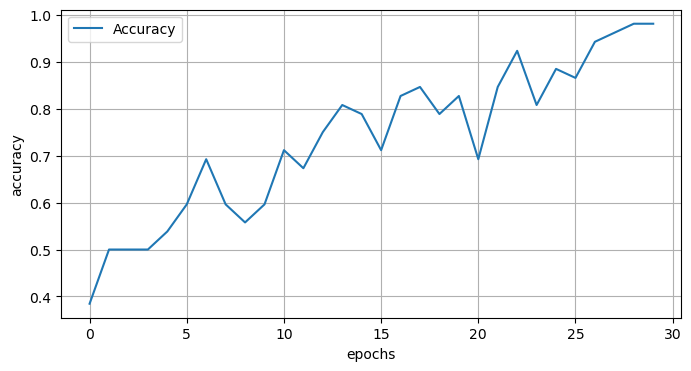

In [14]:
def load_data(folder):
    images=[]
    labels=[]
    for filename in os.listdir(folder):
        label =folder.split('/')[-1]
        img =cv2.imread(os.path.join(folder,filename))
        img =cv2.resize(img,(150,150))
        img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        images.append(img)
        labels.append(label)
        
    return images ,labels

banana_folder ='/kaggle/input/agriculture-crops-dataset/Agricultural-crops/banana'
cucumber_folder='/kaggle/input/agriculture-crops-dataset/Agricultural-crops/Cucumber'

banana_image ,banana_label =load_data(banana_folder)
cucumber_image ,cucumber_label =load_data(cucumber_folder)

images =np.array(banana_image + cucumber_image)
labels =np.array(banana_label + cucumber_label)

print(labels)
label_dict ={'banana': 0,'Cucumber': 1}

encodes_label =np.array([label_dict[label] for label in labels])
print(encodes_label)

X_train,X_test,Y_train,Y_test =train_test_split(images,encodes_label,test_size=0.15,random_state=42)
X_train = X_train.astype('float32')/255.0 
X_test =X_test.astype('float32')/255.0 

model =Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

history=model.fit(X_train,Y_train,epochs=30,batch_size=32)

loss ,accuracy =model.evaluate(X_test,Y_test)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],label="Loss Curve")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'],label="Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.legend()
plt.show()

1/1 [==============================] - 0s 102ms/step
this is banana


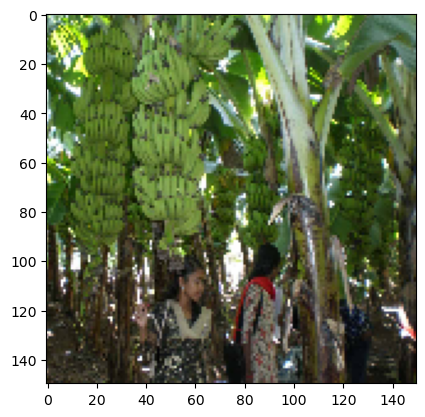

In [15]:
test_image ='/kaggle/input/banana-cucumber/pic1.jpg'

test_image1 =load_img(test_image,target_size=(150,150))

plt.imshow(test_image1)

image1 =image.img_to_array(test_image1)
image1 =np.expand_dims(image1,axis=0)
image1 =image1 / 255.0

predicted =model.predict(image1)
if predicted < 0.5:
    print("this is banana")
if predicted >=0.5:
    print("this is cucumber")

1/1 [==============================] - 0s 31ms/step
this is cucumber


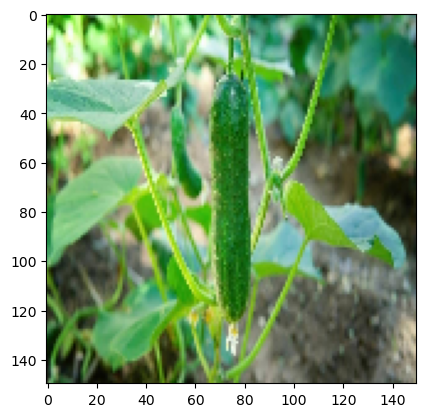

In [16]:
test_image ='/kaggle/input/banana-cucumber/pic2.jpg'

test_image1 =load_img(test_image,target_size=(150,150))

plt.imshow(test_image1)

image1 =image.img_to_array(test_image1)
image1 =np.expand_dims(image1,axis=0)
image1 =image1 / 255.0

predicted =model.predict(image1)
if predicted < 0.5:
    print("this is banana")
if predicted >=0.5:
    print("this is cucumber")

In [17]:
#Lab-02
import numpy as np
from numpy import unravel_index
def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def multi_class(W1, W2, X, D):
    alpha = 0.9
    N = 4
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[k, :].reshape(5, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2
    return W1, W2
def main():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))
    target = np.array([[1],
                     [2],
                     [3],
                     [4],
                     [5]])
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    D = np.eye(5)
    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1
    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)
    N = 4
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        y = np.round(y)
        g,h = unravel_index(y.argmax(), y.shape)
        print(target[g][h])
main()

1
2
3
4


In [18]:
import numpy as np
from numpy import unravel_index

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    ex=np.exp(x)
    return ex/np.sum(ex)


def multi_class(W1,W2,X,D):
    alpha =0.9
    N=5
    for k in range(N):
        x=X[:,:,k].reshape(25,1)
        d=D[k,:].reshape(5,1)
        v1=np.dot(W1,x)
        y1=sigmoid(v1)
        v=np.dot(W2,y1)
        y=softmax(v)
        e=d-y
        delta =e
        e1 =np.dot(W2.T,delta)
        delta1 =y1*(1-y1)*e1
        dW1 =alpha * np.dot(delta1,x.T)
        W1=W1+dW1
        dW2 =alpha * np.dot(delta,y1.T)
        W2 =W2+dW2
    return W1,W2


def main():
    np.random.seed(3)
    X =np.zeros((5,5,5))
    target = np.array([[1],
                     [2],
                     [3],
                     [4],
                     [5]])
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    X[:, :, 4] = np.array([[1, 1, 1, 1, 1],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    D = np.eye(5)
    W1 =2* np.random.rand(50,25) -1
    W2 =2 *np.random.rand(5,50) -1
    for i in range(10000):
        W1,W2 =multi_class(W1,W2,X,D)
    
    N=5
    for i in range(N):
        x=X[:,:,i].reshape(25,1)
        v1=np.dot(W1,x)
        y1=sigmoid(v1)
        v=np.dot(W2,y1)
        y=softmax(v)
        y=np.round(y)
        g,h=unravel_index(y.argmax(),y.shape)
        print(target[g][h])
    
main()

1
2
3
4
5
